In [2]:
from apps.onedimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.onedimensional.shallowwaterlinearizedmomentequations.manufacturedsolutionexample import manufactured_solution_example as swlme_mse
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Manufactured Solution

In [3]:
gravity_constant = 1.0
num_moments = 0
num_eqns = 2 + num_moments

q1 = xt_functions.AdvectingSine(0.1, 1.0, 1.0, 0.0, 1.0)
list_ = [xt_functions.AdvectingSine(0.1, 1.0, 0.0, 0.1 * i, 1.0) for i in range(1, num_eqns)]
list_ = [q1] + list_
exact_solution = xt_functions.ComposedVector(list_)

max_wavespeed = 0.1 + np.sqrt(gravity_constant * 1.1 + 3 * sum([0.1 * 0.1 / (2 * j + 3) for j in range(num_moments)]))

problem = swlme_mse.ManufacturedSolutionExample(
    exact_solution,
    max_wavespeed,
    num_moments,
    gravity_constant,
)

time_final = 0.2
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 3
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 5
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 80
x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["num_basis_cpts"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = explicit_runge_kutta.get_cfl(space_time_order)
#cfl = 0.5
delta_x = (x_right - x_left) / num_elems
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [4]:
final_solution = main.run(problem)

20.0%
Will finish in 0:00:23.126272 at 16:28:57.679003
40.0%
Will finish in 0:00:17.104017 at 16:28:57.277858
60.0%
Will finish in 0:00:11.201488 at 16:28:56.774883
80.0%
Will finish in 0:00:05.942332 at 16:28:58.482822
100.0%
Will finish in 0:00:00 at 16:28:58.214568


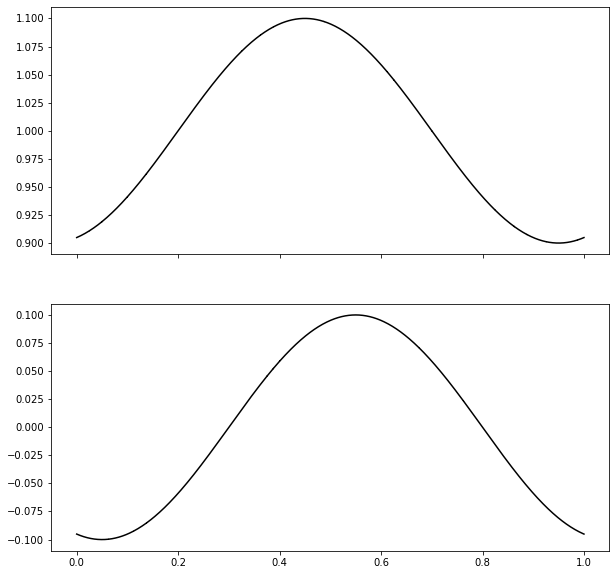

In [5]:
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
exact_final_height = x_functions.FrozenT(list_[0], time_final)
exact_final_momentum = x_functions.FrozenT(list_[1], time_final)
fig = plot.create_plot_dg_1d(final_solution)
#lines = plot.plot_function(fig.axes, exact_final_solution, x_left, x_right, style='b')

#ani, fig = plot.create_animation_output_dir(problem.output_dir, problem.exact_solution)
#HTML(ani.to_html5_video())

In [ ]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error